In [64]:
import datetime
import time
import math
import numpy as np
import pandas as pd
import sys

#For splitting the dataset into train and test

from sklearn.model_selection import train_test_split 

#Package for building CART
from sklearn.tree import DecisionTreeClassifier 

#Packages for arious metrices used to evaluate the model
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# import preprocessing from sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
stevens = pd.read_csv('stevens.csv')

In [4]:
stevens.count()

Docket        566
Term          566
Circuit       566
Issue         566
Petitioner    566
Respondent    566
LowerCourt    566
Unconst       566
Reverse       566
dtype: int64

In [5]:
stevens.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


In [6]:
stevens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
Docket        566 non-null object
Term          566 non-null int64
Circuit       566 non-null object
Issue         566 non-null object
Petitioner    566 non-null object
Respondent    566 non-null object
LowerCourt    566 non-null object
Unconst       566 non-null int64
Reverse       566 non-null int64
dtypes: int64(3), object(6)
memory usage: 39.9+ KB


In [7]:
# Function to split the dataset 
def splitdataset(data, train_index_start, train_index_end, test_index_start, test_index_end): 

    feature_columns = list(data.columns[train_index_start:train_index_end])
    target_column = list(data.columns[test_index_start:test_index_end])
    # Separating the target variable 
    X = data[feature_columns] 
    #print(X)
    Y = data[target_column]
    #print(Y)
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
    return X, Y, X_train, X_test, y_train, y_test 

In [8]:
cols = list(stevens.columns[2:9])
stevens_data = stevens[cols]

In [9]:
stevens_data.columns

Index([u'Circuit', u'Issue', u'Petitioner', u'Respondent', u'LowerCourt',
       u'Unconst', u'Reverse'],
      dtype='object')

### Used pd.get_dummies to convert numeric to categoric.

In [10]:
stevens_with_dummy = pd.get_dummies(stevens_data, drop_first=True)

In [11]:
stevens_with_dummy.shape

(566, 47)

In [12]:
stevens_with_dummy.columns

Index([u'Unconst', u'Reverse', u'Circuit_11th', u'Circuit_1st', u'Circuit_2nd',
       u'Circuit_3rd', u'Circuit_4th', u'Circuit_5th', u'Circuit_6th',
       u'Circuit_7th', u'Circuit_8th', u'Circuit_9th', u'Circuit_DC',
       u'Circuit_FED', u'Issue_CivilRights', u'Issue_CriminalProcedure',
       u'Issue_DueProcess', u'Issue_EconomicActivity',
       u'Issue_FederalTaxation', u'Issue_FederalismAndInterstateRelations',
       u'Issue_FirstAmendment', u'Issue_JudicialPower', u'Issue_Privacy',
       u'Issue_Unions', u'Petitioner_BUSINESS', u'Petitioner_CITY',
       u'Petitioner_CRIMINAL.DEFENDENT', u'Petitioner_EMPLOYEE',
       u'Petitioner_EMPLOYER', u'Petitioner_GOVERNMENT.OFFICIAL',
       u'Petitioner_INJURED.PERSON', u'Petitioner_OTHER',
       u'Petitioner_POLITICIAN', u'Petitioner_STATE', u'Petitioner_US',
       u'Respondent_BUSINESS', u'Respondent_CITY',
       u'Respondent_CRIMINAL.DEFENDENT', u'Respondent_EMPLOYEE',
       u'Respondent_EMPLOYER', u'Respondent_GOVERNMENT.O

In [13]:
X = stevens_with_dummy.loc[:, stevens_with_dummy.columns != 'Reverse']
Y = stevens_with_dummy.loc[:, stevens_with_dummy.columns == 'Reverse']
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [14]:
X_test.head()

,Unconst,Circuit_11th,Circuit_1st,Circuit_2nd,Circuit_3rd,Circuit_4th,Circuit_5th,Circuit_6th,Circuit_7th,Circuit_8th,...,Respondent_CRIMINAL.DEFENDENT,Respondent_EMPLOYEE,Respondent_EMPLOYER,Respondent_GOVERNMENT.OFFICIAL,Respondent_INJURED.PERSON,Respondent_OTHER,Respondent_POLITICIAN,Respondent_STATE,Respondent_US,LowerCourt_liberal
560,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
354,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
268,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
219,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
540,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
y_test.head()

,Reverse
560,1
354,0
268,1
219,1
540,1


In [51]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=15, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [57]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [53]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [54]:

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ") 
    print(confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ") 
    print(accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ") 
    print(classification_report(y_test, y_pred)) 

In [55]:
y_test.columns


Index([u'bucket2009'], dtype='object')

In [20]:
X_train.shape

(396, 46)

In [21]:
X_test.shape

(170, 46)

In [22]:
clf_gini = train_using_gini(X_train, y_train) 

# Operational Phase 
print("Results Using Gini Index:") 

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 


Results Using Gini Index:
Predicted values:
[1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0]
Confusion Matrix: 
[[61 21]
 [34 54]]
Accuracy : 
67.64705882352942
Report : 
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        82
           1       0.72      0.61      0.66        88

   micro avg       0.68      0.68      0.68       170
   macro avg       0.68      0.68      0.68       170
weighted avg       0.68      0.68      0.68       170



In [23]:
clf_entropy = tarin_using_entropy(X_train, y_train) 
print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0]
Confusion Matrix: 
[[61 21]
 [34 54]]
Accuracy : 
67.64705882352942
Report : 
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        82
           1       0.72      0.61      0.66        88

   micro avg       0.68      0.68      0.68       170
   macro avg       0.68      0.68      0.68       170
weighted avg       0.68      0.68      0.68       170



### Used sklearn.preprocess.one_hot_encoding to convert numeric to categoric.

In [34]:
stevens_data.head()

,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


In [42]:
# TODO: create a LabelEncoder object and fit it to each feature in stevens data


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.OneHotEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
stevens_withOneHot = le.fit_transform(stevens_data).toarray() 


In [43]:
stevens_withOneHot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [234]:
X = stevens_withOneHot.loc[:, stevens_withOneHot.columns != 'Reverse']
Y = stevens_withOneHot.loc[:, stevens_withOneHot.columns == 'Reverse']
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [235]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396, 6), (170, 6), (396, 1), (170, 1))

In [236]:
clf_gini = train_using_gini(X_train, y_train) 

# Operational Phase 
print("Results Using Gini Index:") 

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 


Results Using Gini Index:
Predicted values:
[1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
Confusion Matrix: 
[[60 22]
 [38 50]]
Accuracy : 
64.70588235294117
Report : 
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        82
           1       0.69      0.57      0.62        88

   micro avg       0.65      0.65      0.65       170
   macro avg       0.65      0.65      0.65       170
weighted avg       0.65      0.65      0.65       170



In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 

In [28]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X_train.columns),class_names=['0','1'])

In [29]:
import pydotplus

In [1]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

### D2Hawkeye: Video 71 - 

In [18]:
claims = pd.read_csv("ClaimsData.csv")

In [19]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458005 entries, 0 to 458004
Data columns (total 16 columns):
age                  458005 non-null int64
alzheimers           458005 non-null int64
arthritis            458005 non-null int64
cancer               458005 non-null int64
copd                 458005 non-null int64
depression           458005 non-null int64
diabetes             458005 non-null int64
heart.failure        458005 non-null int64
ihd                  458005 non-null int64
kidney               458005 non-null int64
osteoporosis         458005 non-null int64
stroke               458005 non-null int64
reimbursement2008    458005 non-null int64
bucket2008           458005 non-null int64
reimbursement2009    458005 non-null int64
bucket2009           458005 non-null int64
dtypes: int64(16)
memory usage: 55.9 MB


In [20]:
claims.count()

age                  458005
alzheimers           458005
arthritis            458005
cancer               458005
copd                 458005
depression           458005
diabetes             458005
heart.failure        458005
ihd                  458005
kidney               458005
osteoporosis         458005
stroke               458005
reimbursement2008    458005
bucket2008           458005
reimbursement2009    458005
bucket2009           458005
dtype: int64

In [22]:
claims.shape

(458005, 16)

In [23]:
claims.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000
mean,72.628401,0.192214,0.154293,0.064106,0.136071,0.213076,0.380463,0.284744,0.420063,0.161153,0.173996,0.044792,4004.963854,1.436862,4277.432823,1.522160
std,12.557114,0.394041,0.361230,0.244942,0.342864,0.409482,0.485501,0.451293,0.493569,0.367673,0.379106,0.206847,9784.064063,0.861955,8480.041283,0.870425
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.000000
50%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,1.000000,1540.000000,1.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,2.000000,4220.000000,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


In [25]:
claims.head(5)

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [42]:
X1 = claims.loc[:, claims.columns != 'bucket2009']
X = X1.loc[:, X1.columns != 'reimbursement2009']
Y = claims.loc[:, claims.columns == 'bucket2009']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100)

In [44]:
print(X_train.count())

age                  274803
alzheimers           274803
arthritis            274803
cancer               274803
copd                 274803
depression           274803
diabetes             274803
heart.failure        274803
ihd                  274803
kidney               274803
osteoporosis         274803
stroke               274803
reimbursement2008    274803
bucket2008           274803
dtype: int64


In [45]:
print(X_test.count())

age                  183202
alzheimers           183202
arthritis            183202
cancer               183202
copd                 183202
depression           183202
diabetes             183202
heart.failure        183202
ihd                  183202
kidney               183202
osteoporosis         183202
stroke               183202
reimbursement2008    183202
bucket2008           183202
dtype: int64


In [56]:
clf_gini = train_using_gini(X_train, y_train) 

# Operational Phase 
print("Results Using Gini Index:") 

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 


Results Using Gini Index:
Predicted values:
[1 1 1 ... 1 1 1]
Confusion Matrix: 
[[111882   9596   1126    357      3]
 [ 18043  14373   1735    642      7]
 [  7962   7008    944    453      6]
 [  3202   3776    519    491      2]
 [   344    542     79    109      1]]
Accuracy : 
69.69956659861792
Report : 
              precision    recall  f1-score   support

           1       0.79      0.91      0.85    122964
           2       0.41      0.41      0.41     34800
           3       0.21      0.06      0.09     16373
           4       0.24      0.06      0.10      7990
           5       0.05      0.00      0.00      1075

   micro avg       0.70      0.70      0.70    183202
   macro avg       0.34      0.29      0.29    183202
weighted avg       0.64      0.70      0.66    183202



###  Recitation 4 - Housing

In [58]:
boston = pd .read_csv('boston.csv')

In [59]:
boston.count()

TOWN       506
TRACT      506
LON        506
LAT        506
MEDV       506
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
dtype: int64

In [60]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
TOWN       506 non-null object
TRACT      506 non-null int64
LON        506 non-null float64
LAT        506 non-null float64
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.3+ KB


In [61]:
boston.describe()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


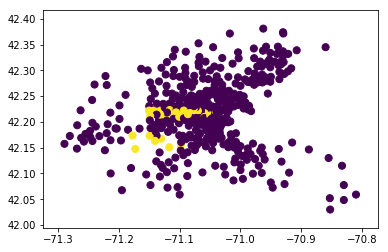

In [74]:
plt.scatter(boston.LON, boston.LAT,  c = boston["CHAS"], s = 50)

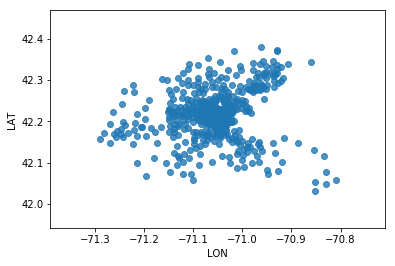

In [68]:
sns.regplot(x=boston["LON"], y=boston["LAT"], fit_reg = False)

In [75]:
boston.NOX.describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

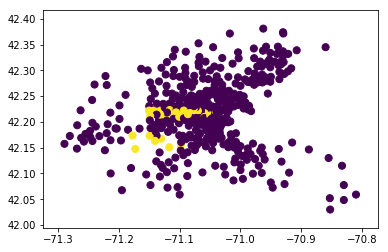

In [83]:
plt.scatter(boston.LON, boston.LAT,  c = boston["CHAS"], s = 50)

In [84]:
X = boston[['LAT', 'LON']].values

y = boston['MEDV'].values

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  

regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     30.19
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           4.16e-13
Time:                        04:49:31   Log-Likelihood:                -1810.7
No. Observations:                 506   AIC:                             3627.
Df Residuals:                     503   BIC:                             3640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3178.4720    484.937     -6.554      0.0

In [93]:
PointsReg = LinearRegression()  
PointsReg.fit(X, y) #training the algorithm

y_pred = PointsReg.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,24.0,18.756331
1,21.6,18.816479
2,34.7,18.216514
3,33.4,17.974825
4,36.2,17.773444
5,28.7,17.600243
6,22.9,18.329157
7,22.1,18.494156
8,16.5,18.329039
9,18.9,18.200149


In [96]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [97]:
y_pred = regressor.predict(X) 

In [98]:
y_pred

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 22.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.2, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [112]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
dotdata = export_graphviz(regressor, out_file ='tree.dot', 
               feature_names = ['LON', 'LAT'], class_names = [0,1])

In [113]:
import pydotplus
